# NBA Player Data

### One .csv from:
https://www.kaggle.com/drgilermo/nba-players-stats

### Data collected by Omri Goldstein from Kaggle with 162 votes by the community. He scraped this from basketball-reference.com.

### Data Contents: NBA Player Stats from 1950-2017


* Seasons_Stats.csv: Very detailed season stats for every NBA player. Describes important game statistics as column headers including: 

    Team, games, games started, minutes played, player efficiency rating, true shooting percent, 3 point attempt rate, free throw rate, offensive rebound percentage, etc. 
    
    Size - 24.7k x 53




# Why this dataset?

## These datasets are required to answer the following questions


# Questions:
* How have injuries impacted player performance?
 
    * Do they perform the same or worse after returning?
    * Case study: Grant Hill, hall of famer remembered for a knee injury that plagued his career. 
    
* How do Lebron James' stats reflect his age? Is Lebron slowing down with age, staying the same, or is he getting even better? 



In [173]:
import csv
import pprint
import matplotlib.pyplot as plt
from functools import reduce

reader = csv.DictReader(open('nba-players-stats/Seasons_Stats.csv', 'r'))    
season_stats = []

for line in reader:
    season_stats.append(line)


season_stats[:5]
    
# Entry number is same as index 

[OrderedDict([('', '0'),
              ('Year', '1950'),
              ('Player', 'Curly Armstrong'),
              ('Pos', 'G-F'),
              ('Age', '31'),
              ('Tm', 'FTW'),
              ('G', '63'),
              ('GS', ''),
              ('MP', ''),
              ('PER', ''),
              ('TS%', '0.368'),
              ('3PAr', ''),
              ('FTr', '0.467'),
              ('ORB%', ''),
              ('DRB%', ''),
              ('TRB%', ''),
              ('AST%', ''),
              ('STL%', ''),
              ('BLK%', ''),
              ('TOV%', ''),
              ('USG%', ''),
              ('blanl', ''),
              ('OWS', '-0.1'),
              ('DWS', '3.6'),
              ('WS', '3.5'),
              ('WS/48', ''),
              ('blank2', ''),
              ('OBPM', ''),
              ('DBPM', ''),
              ('BPM', ''),
              ('VORP', ''),
              ('FG', '144'),
              ('FGA', '516'),
              ('FG%', '0.279'),
        

# Cleaning:

* Problems: Some entries are NaN for a few reasons. Some stats didn't exist in certain years, eg. 3 pointers weren't added until '79. In other years, certain stats (TOV, ORB, DRB, etc) were just simply not recorded. For these entries, the csv records null. 


* This problem only applies to "antique" player records. We do not have this entry discrepency with modern players. 

# Question 1 - How have injuries impacted player performance?

* Problems implementing this __without pandas__:
    * average_stats takes dataframe as parameter
    * using the dataframe, you can index right into a certain player stat
    
* Attempt without pandas:
    * Find Grant Hill's entry in the dictionary
    * Get his PER for each year
    * Average and compare the two time periods


# The Case of Grant Hill

* The years we're interested in are his full, healthy seasons before injury: 1995-2001 and his seasons after: 2002-2013

## First, we will examine his PER. 

In [158]:
grantHill = [] #create list of only Grant's entries
for i in range(len(season_stats)):
    if (season_stats[i]["Player"] == "Grant Hill"):
        grantHill.append(season_stats[i])



In [161]:
#access each year's PER value
perValues = []
for i in range(len(grantHill)):
     perValues.append(grantHill[i]["PER"])
        
#get the years before injury
beforeInjury = perValues[:7]
afterInjury = perValues[7:]

#parse list of strings to int

beforeInjury = list(map(float, beforeInjury))
afterInjury = list(map(float, afterInjury))

averageBefore = reduce((lambda x, y: x + y), beforeInjury)/ len(beforeInjury)
averageAfter = reduce((lambda x, y: x + y), afterInjury)/ len(afterInjury)



In [162]:
injury_impact = averageBefore - averageAfter

if(injury_impact < 0):
    print (f'The impact of injury is: {injury_impact}. Fortunately, this player has improved after injury.')

else:
    print (f'The impact of injury is: {injury_impact}. Unfortunately, this player has declined after injury.')


The impact of injury is: 6.462337662337662. Unfortunately, this player has declined after injury.


## Secondly, we'll look at his Games played and Minutes played
* 2 important stats that can serve as a general indicator of a player's consistency and overall fitness. 
* Without Pandas: Do the same thing as before with PER

In [163]:
#access each year's G and MP value
gValues = []
for i in range(len(grantHill)):
     gValues.append(grantHill[i]["G"])
        
#get the years before injury
print(gValues)
beforeInjury_G = gValues[:7]
afterInjury_G = gValues[7:]

#parse list of strings to int

beforeInjury_G = list(map(float, beforeInjury_G))
afterInjury_G = list(map(float, afterInjury_G))

averageBefore_G = reduce((lambda x, y: x + y), beforeInjury_G)/ len(beforeInjury_G)
averageAfter_G = reduce((lambda x, y: x + y), afterInjury_G)/ len(afterInjury_G)



['70', '80', '80', '81', '50', '74', '4', '14', '29', '67', '21', '65', '70', '82', '81', '80', '49', '29']


In [164]:
injury_impact_G = averageBefore_G - averageAfter_G

if(injury_impact_G < 0):
    print (f'The impact of injury is: {injury_impact_G}. Fortunately, this player has improved after injury.')

else:
    print (f'The impact of injury is: {injury_impact_G}. Unfortunately, this player has declined after injury.')


The impact of injury is: 9.350649350649348. Unfortunately, this player has declined after injury.


# Conclusion to Q1:
* Both Grant Hill's average PER and G/MP declined after the year 2001, which is when his injury happened. 
* While this code doesn't take into account other factors that can affect these 3 stats, such as age, team changes, position changes, etc, it can give us a general idea of the impact of his injury on his NBA career.
* The functions used to answer Q1 can be used to analyze other players  by adjusting the parameters. 

# Question 2 - Do Lebron James' stats reflect his age? Is Lebron slowing down with age, staying the same, or is he getting even better? 


* Key stats to look for: 
    Games (G), Games Started (GS), Minutes Played (MP), PER, effective field goal percentage (eFG%), PTS (points per season), AST (assists per season), STL (steals per season), BLK (blocks per season)
    
* Method: Examine these stats for each year. If needed, compare them to __career averages__. 

## Without Pandas:
* Attempt to plot without dataframe assistance
* Will use orderedDict instead

In [165]:
lebron_stats = [] #create list of only Lebron's entries
for i in range(len(season_stats)):
    if (season_stats[i]["Player"] == "LeBron James"):
        lebron_stats.append(season_stats[i])
        


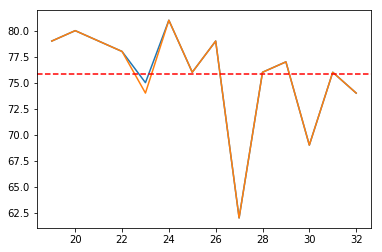

[19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0]
[79.0, 80.0, 79.0, 78.0, 75.0, 81.0, 76.0, 79.0, 62.0, 76.0, 77.0, 69.0, 76.0, 74.0]
[3122.0, 3388.0, 3361.0, 3190.0, 3027.0, 3054.0, 2966.0, 3063.0, 2326.0, 2877.0, 2902.0, 2493.0, 2709.0, 2794.0]
[130.0, 177.0, 123.0, 125.0, 138.0, 137.0, 125.0, 124.0, 115.0, 129.0, 121.0, 109.0, 104.0, 92.0]


In [175]:
# Plot age against Games played


# Get current axis to use for additional axis ax keyword arg
# Plot G and GS over eachother
# NEED: Axis for age as list of ages; G, GS, other stats, as list
# After that, convert lists from string to float
# PLOT
age = []
G = []
GS = []
MP = []
per = []
pts = []
assists = []
steals = []
blocks = []
efg = []

#Generate lists for each stat type
for i in range(len(lebron_stats)):
     age.append(lebron_stats[i]["Age"])

for i in range(len(lebron_stats)):
     G.append(lebron_stats[i]["G"])

for i in range(len(lebron_stats)):
     GS.append(lebron_stats[i]["GS"])
        

for i in range(len(lebron_stats)):
     MP.append(lebron_stats[i]["MP"])
        
for i in range(len(lebron_stats)):
     per.append(lebron_stats[i]["PER"])

    
for i in range(len(lebron_stats)):
     pts.append(lebron_stats[i]["PTS"])
        
for i in range(len(lebron_stats)):
     assists.append(lebron_stats[i]["AST"])
        
for i in range(len(lebron_stats)):
     steals.append(lebron_stats[i]["STL"])
        
for i in range(len(lebron_stats)):
     blocks.append(lebron_stats[i]["BLK"])
        
for i in range(len(lebron_stats)):
     efg.append(lebron_stats[i]["eFG%"])

#Convert from string to float for calculations
age = list(map(float, age))
G = list(map(float, G))
GS = list(map(float, GS))
MP = list(map(float, MP))
per = list(map(float, per))
pts = list(map(float, pts))
assists = list(map(float, assists))
steals = list(map(float, steals))
blocks = list(map(float, blocks))
efg = list(map(float, efg))

#Get averages for each player stat
averageG = reduce((lambda x, y: x + y),G)/ len(G)
averageMP = reduce((lambda x, y: x + y),MP)/ len(MP)
averagePER = reduce((lambda x, y: x + y),per)/ len(per)
averageEFG = reduce((lambda x, y: x + y),efg)/ len(efg)
averageSTL = reduce((lambda x, y: x + y),steals)/ len(steals)
averageBLK = reduce((lambda x, y: x + y),blocks)/ len(blocks)
averageAST = reduce((lambda x, y: x + y),assists)/ len(assists)
averagePTS = reduce((lambda x, y: x + y),pts)/ len(pts)


plt.plot(age, G)
plt.plot(age, GS)
plt.axhline(averageG, color = 'r', linestyle = "--")
plt.show()

#periodically show subsets of data
print(age)
print(G)
print(MP)
print(steals)





## First impressions: 
* By overlaying his games started over games, with respect to age, we can see that age has __not__ affected his ability to play on the starting 5. In other words, age has not caused him to be benched in favor of younger players.
* However, he is currently playing __fewer games per season than average__.

## Minutes Played
* We see LeBron's MP dip __below__ his average as he ages. 

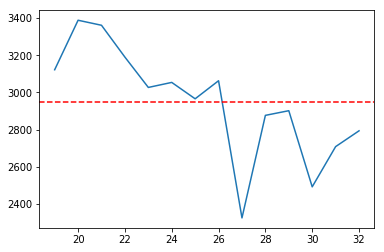

In [167]:

plt.plot(age, MP)


#Overlay average minutes played with this graph


plt.axhline(averageMP, color = 'r', linestyle = '--' )

# Performance efficiency rating
* LeBron has been quite consistent with his PER, apart from the outliers from his rookie years, he has __maintained a PER at or above his average.__

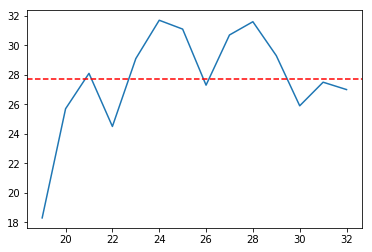

In [168]:
plt.plot(age, per)
plt.axhline(averagePER, color = 'r', linestyle = '--' )

# eFG%:
* In recent years, LeBron has __exceeded or matched__ his average eFG%.

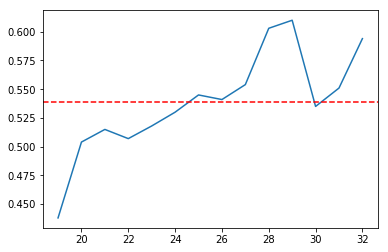

In [169]:
plt.plot(age, efg)

# plot average against trend
plt.axhline(averageEFG, color = 'r', linestyle = '--' )

# Points, assists, steals, blocks
* Plot points and assists separately due to higher value ranges
* We observe that his points, steals, and blocks are __below career average__ in recent years. 
* However, his assists are currently __above average__.

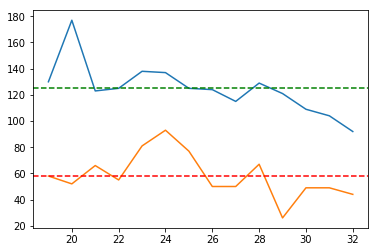

In [170]:

plt.plot(age, steals)

plt.plot(age, blocks)

# plot average against trend
plt.axhline(averageSTL, color = "g", linestyle = "--")
plt.axhline(averageBLK, color = "r", linestyle = "--")

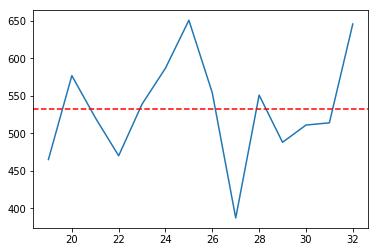

In [171]:
plt.plot(age, assists)

plt.axhline(averageAST, color = 'r', linestyle = "--")

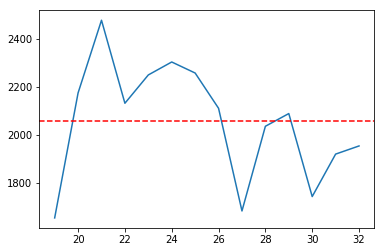

In [172]:
plt.plot(age, pts)

plt.axhline(averagePTS, color = 'r', linestyle = "--")

# Conclusion to Q2:
* By plotting LeBron's stat trend against age, we are able to conclude that the following stats have __improved or stayed the same__ with age.
    * PER, eFG%, AST
* However, some stats have definitely __fallen off__ with age: 
    * MP, G, PTS, STL, BLK
    
## Has age caused LeBron to decline? 
* Yes, in some aspects. However, he has improved in both PER and eFG%, both of which are important stats that cannot be ignored. PER is an official value formulated by John Hollinger.

# Final comments on Python version

## Approach: 
* Instead of relying on the indexability of dataframes, I pre-populated lists with the data I needed.
* No problems except for the initial representation of the dictionary.
* Not as modular as with pandas.
* Had to change the plotting to work without dataframes.